In [89]:
#read the dataset
import pandas as pd
data = pd.read_csv('/content/all_kindle_review .csv')
data.head()

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000


In [90]:
#understand the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    12000 non-null  int64 
 1   Unnamed: 0      12000 non-null  int64 
 2   asin            12000 non-null  object
 3   helpful         12000 non-null  object
 4   rating          12000 non-null  int64 
 5   reviewText      12000 non-null  object
 6   reviewTime      12000 non-null  object
 7   reviewerID      12000 non-null  object
 8   reviewerName    11962 non-null  object
 9   summary         11998 non-null  object
 10  unixReviewTime  12000 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 1.0+ MB


In [91]:
#summary of data reviews
data.summary.head()

,summary
0,Entertaining But Average
1,Terrific menage scenes!
2,Snapdragon Alley
3,very light murder cozy
4,Book


In [92]:
#discribtion of review text data
data.reviewText.head()

,reviewText
0,"Jace Rankin may be short, but he's nothing to ..."
1,Great short read. I didn't want to put it dow...
2,I'll start by saying this is the first of four...
3,Aggie is Angela Lansbury who carries pocketboo...
4,I did not expect this type of book to be in li...


In [93]:
#shape of rows and column
data.shape

(12000, 11)

In [94]:
# check unique categories
data['rating'].value_counts()

,count
rating,
5,3000
4,3000
3,2000
2,2000
1,2000


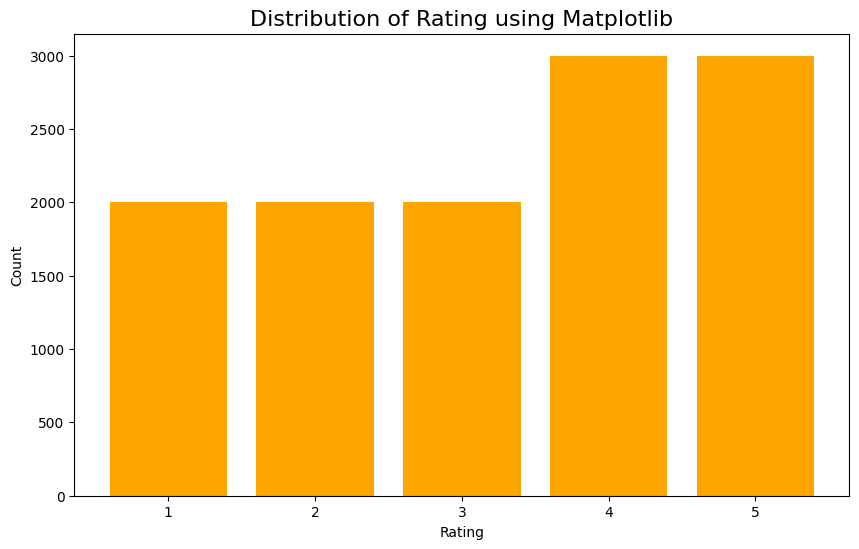

In [95]:
import matplotlib.pyplot as plt
# Count the occurrences of each rating
rating_counts = data['rating'].value_counts().sort_index()

# Count the occurrences of each rating
rating_counts = data['rating'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(rating_counts.index, rating_counts.values, align='center', color=['orange'])
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Rating')
plt.xticks(range(1, 6))

# Add titles and labels
plt.title('Distribution of Rating using Matplotlib', fontsize=16)

# Show the plot
plt.show()

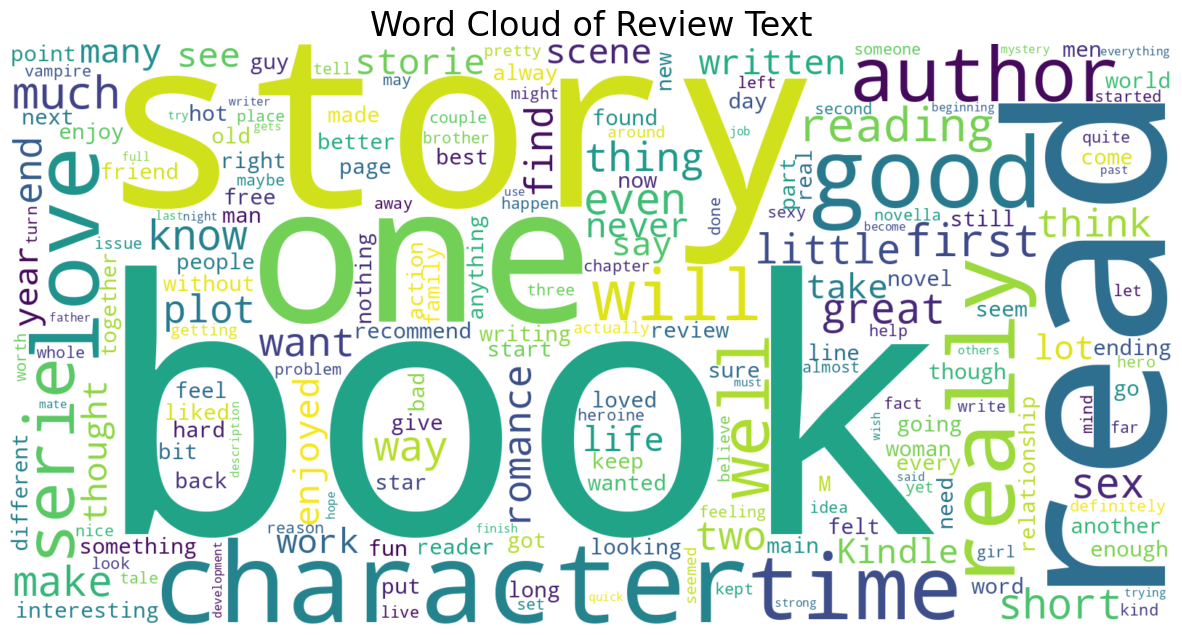

In [96]:
# Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'reviewText' is the column with text data
text = ' '.join(data['reviewText'].astype(str).tolist())

# Create a larger word cloud
word_cloud = WordCloud(width=1600, height=800, collocations=False, background_color='white').generate(text)

# Plotting the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Review Text", fontsize=24)
plt.show()

In [97]:
data['rating'].value_counts()

,count
rating,
5,3000
4,3000
3,2000
2,2000
1,2000


In [118]:
# import libaries
import re
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
from nltk.corpus import wordnet
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

In [99]:
#downlode wordnet
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [100]:
# Download stopwords
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger') # Download here

# Get the list of stop words
stop_words = stopwords.words('english')

#remove stopwords
data['reviewText'] = data['reviewText'].apply(lambda x: " ".join([i for i in x.split() if i not in stop_words]) )

#remove url and tags
data['reviewText'] = data['reviewText'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , str(x)))

#remove extra spaces
data['reviewText'] = data['reviewText'].apply(lambda x: " ".join(x.split()))

#remove html
data['reviewText'] = data['reviewText'].apply(lambda x: BeautifulSoup(x,'html.parser').get_text())



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
<ipython-input-100-4feb0243de4d>:18: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['reviewText'] = data['reviewText'].apply(lambda x: BeautifulSoup(x,'html.parser').get_text())


In [101]:
for i in range(len(data['rating'])):
    if data['rating'][i] > 3:
        data['rating'][i] = 'positive'
    elif data['rating'][i] == 3:
        data['rating'][i] = 'neutral'
    else:
        data['rating'][i] ='negative'

<ipython-input-101-9212168c5a22>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['rating'][i] = 'neutral'
<ipython-input-101-9212168c5a22>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

In [102]:
for i in range(len(data['rating'])):
    # Check if the rating is still a numeric type before comparison
    if isinstance(data['rating'][i], (int, float)) and data['rating'][i] > 3:
        data['rating'][i] = 'positive'
    elif isinstance(data['rating'][i], (int, float)) and data['rating'][i] == 3:
        data['rating'][i] = 'neutral'
    elif isinstance(data['rating'][i], (int, float)) and data['rating'][i] < 3:
        data['rating'][i] = 'negative'
        data['rating'][i] = 'neutral'
    elif isinstance(data['rating'][i], (int, float)) and data['rating'][i] < 3:
        data['rating'][i] = 'negative'

In [103]:
data['rating'].value_counts()


,count
rating,
positive,6000
negative,4000
neutral,2000


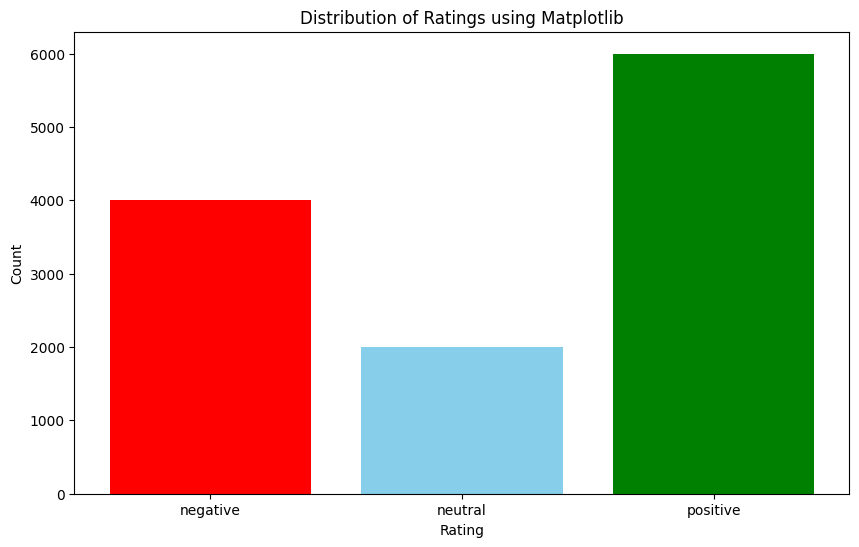

In [104]:
rating_counts = data['rating'].value_counts().sort_index()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(rating_counts.index,rating_counts.values,align='center',color=['red','skyblue','green'])
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings using Matplotlib')
plt.show()

In [108]:
x=data['reviewText']
y=data['rating']

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(x)

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [113]:
y_pred=model.predict(x_test)

In [115]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.7616666666666667
Confusion Matrix:
[[ 653   25  125]
 [ 121   70  196]
 [  65   40 1105]]
Classification Report:
              precision    recall  f1-score   support

    negative       0.78      0.81      0.80       803
     neutral       0.52      0.18      0.27       387
    positive       0.77      0.91      0.84      1210

    accuracy                           0.76      2400
   macro avg       0.69      0.64      0.63      2400
weighted avg       0.73      0.76      0.73      2400



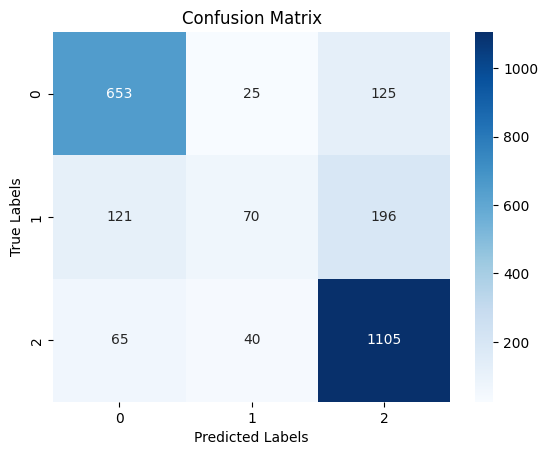

In [119]:
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()